# 서포트 벡터 머신(SVM: Support Vector Machine)

- 분류에 사용할 수 있는 강력한 머신러닝 지도 학습 모델
- 결정 경계(decision boundary), 분류를 위한 기준 선 정의 모델
- 속성의 갯수가 늘어날수록 결정 경계도 평면이 아닌 고차원이되고 '초평면(hyperplane)' 이라고 함
- 최적의 결정 경계는 데이터군으로부터 최대한 멀리 떨어지는 것이 좋다
- support vetctor은 결정 경계와 가까이 있는 데이터 포인트

- sckit-learn에서 SVM 모델이 오류를 어느정도 허용할 것인지 파라미터 C를 통해 지정
- C값이 클수록 하드마진(오류 허용X)-오버피팅 문제 발생,작을수록 소프트마진(오류 허용O)-언더피팅 문제 발생

- 방사 기저 함수(RBF:Radical Bias Function)를 커널 혹은 가우시안 커널이라 함
- gamma는 결정 경계를 얼마나 유연하게 그을지 정해주는 파라미터
- gamma 값이 크면 결정 경계를 구불구불 그어 오버피팅 초래, 작으면 결정 경계를 직선에 가깝게 그어 언더피팅 발생

### 선형 분류기 훈련

- 초평면은 n차원 공간에 있는 n-1 부분 공간으로 정의
- SVC모델의 매개변수 C는 잘못 분류된 데이터 포인트에 부여하는 페널티
- C가 작으면 분류기는 잘못 분류된 데이터 포인트 허용
- C가 크면 분류기는 잘못 분류된 데이터에 큰 페널티 부과

In [1]:
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() # 데이터 로드
features = iris.data[:100,:2] #두 개의 클래스와 두 개의 특성만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)
svc = LinearSVC(C=1.0) # 서포트 벡터 분류기 생성
model = svc.fit(features_standardized, target) # 모델 훈련

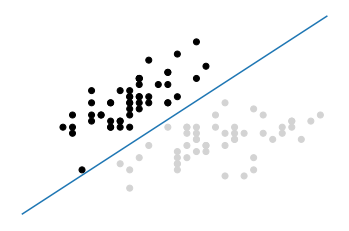

array([-6.84224149])

In [2]:
from matplotlib import pyplot as plt

# 클래스를 색으로 구분한 산점도를 그림
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# 초평면 생성
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

plt.plot(xx, yy) # 초평면을 그림
plt.axis("off"), plt.show();

new_observation = [[ -2, 3]] # 새로운 샘플 생성
svc.predict(new_observation) # 새로운 샘플의 클래스 예측
svc.decision_function(new_observation)

### 커널을 사용해 선형적으로 구분되지 않는 클래스 다루기

- 클래스가 선형적으로 구분되지 않을때 비선형 결정 경계를 만들기 위해 커널 함수를 사용한 서포트 벡터 머신으로 훈련

In [4]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(0) # 랜덤 시드를 지정
features = np.random.randn(200, 2) # 두 개의 특성 생성

# XOR 연산을 사용하여 선형적으로 구분할 수 없는 클래스 생성
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

# 방사 기저 함수 커널을 사용한 서포트 벡터 머신 생성
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
model = svc.fit(features, target) # 분류기 훈련

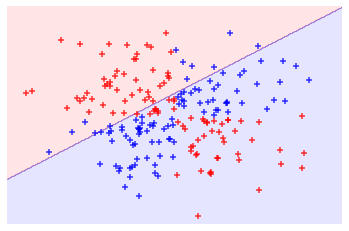

In [5]:
# 샘플과 결정 경계 그림
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap.colors[idx],marker="+", label=cl)

# 선형 커널을 사용한 서포트 벡터 분류기 생성
svc_linear = SVC(kernel="linear", random_state=0, C=1)
svc_linear.fit(features, target) # 모델 훈련
plot_decision_regions(features, target, classifier=svc_linear) # 샘플과 초평면을 그림
plt.axis("off"), plt.show();

### 예측 확률 계산

- 사이킷런의 SVC 클래스를 사용할 때 provavility=True로 지정하여 모델을 훈련하면 predict_proba()에서 보정된 확률 확인 가능

In [6]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

# 서포트 벡터 분류기 객체 생성
svc = SVC(kernel="linear", probability=True, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련
new_observation = [[.4, .4, .4, .4]] #New Sample Data
model.predict_proba(new_observation) # 예측 확률 확인

array([[0.00582525, 0.96725691, 0.02691783]])

### 서포트 벡터 식별

- 사이킷런의 SVC를 훈련하고 support_vectors_를 사용해 모델에 있는 서포트 벡터 식별
- support_속성을 사용하여 서포트 벡터의 인덱스 확인 가능

In [7]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", random_state=0) # 서포트 벡터 분류기 객체 생성
model = svc.fit(features_standardized, target) # 분류기 훈련

model.support_vectors_ # 서포트 벡터를 확인
model.support_

array([23, 41, 57, 98])

### 불균형한 클래스 다루기

- class_weight 매개변수를 사용 작은 클래스를 잘못 분류했을 때 페널티 증가

In [8]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]

features = features[40:,:] # 처음 40개 샘플을 제거
target = target[40:] #불균형한 클래스 만듬

# 타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듬
target = np.where((target == 0), 0, 1)
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

svc = SVC(kernel="linear", class_weight="balanced", C=1.0, random_state=0)
model = svc.fit(features_standardized, target) # 분류기 훈련